**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
for(txt in vec){cat(txt, "\n")}

matrix.annotation.encode_chipseq_flagship.tsv 
matrix.annotation.encode_chipseq_full.tsv 
matrix.annotation.encode_chipseq_histone.tsv 
matrix.annotation.encode_chipseq_subset.tsv 
matrix.annotation.encode_chromatin_states.ccres.tsv 
matrix.annotation.encode_chromatin_states.chromhmm.tsv 
matrix.annotation.encode_chromatin_states.full.tsv 
matrix.annotation.fcc_peak_call.tsv 
matrix.annotation.genome_tss.tsv 
matrix.annotation.merge.fcc.tss.chipseq.tsv 
region.annotation.encode_chipseq_flagship.tmp.tsv 
region.annotation.encode_chipseq_flagship.tsv 
region.annotation.encode_chipseq_histone.tsv 
region.annotation.encode_chipseq_subset.tsv 
region.annotation.encode_chromatin_states.tsv 
region.annotation.encode_e2g_benchmark.tsv 
region.annotation.fcc_astarr_csaw.tsv 
region.annotation.fcc_crispri_growth.tsv 
region.annotation.fcc_crispri_hcrff.tsv 
region.annotation.fcc_mpra_agarwal2023.tsv 
region.annotation.fcc_starrmpra_junke.tsv 
region.annotation.genome_tss.tsv 
region.annotation.m

In [7]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.fcc_peak_call.label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_fcc_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 155926     19


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Label3,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,10038,10405,chr1:10038-10405,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,10038,10405,chr1:10038-10405,Repress_GCFilter,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0


## Arrange table

In [4]:
fun_str_map = function(vec_txt_input){
    vec_txt_output = fun_str_map_match(
        vec_txt_input   = vec_txt_input,
        vec_txt_pattern = c("TSS:Enhancer",    "TSS:Silencer",        "Enhancer",      "Silencer"),
        vec_txt_replace = c("Proximal:Active", "Proximal:Repressive", "Distal:Active", "Distal:Repressive"),
    )    
    return(vec_txt_output)
}

In [8]:
dat = dat_region_annot_fcc_import

table(dat$Type)


         Enhance          Repress Repress_GCFilter 
           43993            65401            46532 

In [9]:
dat = dat_region_annot_fcc_import
vec = c("Enhance", "Repress")
dat = dat %>% 
    dplyr::filter(Type %in% vec) %>%
    dplyr::filter(Num_Assay > 1)

dat = dat %>% dplyr::mutate(Label = fun_str_map(Label3))


dat_region_annot_fcc_filter = dat

print(dim(dat))
cat("\n")
print(table(dat$Label1))
cat("\n")
print(table(dat$Label2))
cat("\n")
print(table(dat$Label3))
cat("\n")
print(table(dat$Label))

[1] 18346    20


Enhancer Silencer 
   16597     1749 


Enhancer Promoter Silencer 
   11623     5083     1640 


    Enhancer     Silencer TSS:Enhancer TSS:Silencer 
       11623         1640         4974          109 


      Distal:Active   Distal:Repressive     Proximal:Active Proximal:Repressive 
              11623                1640                4974                 109 


In [10]:
dat = dat_region_annot_fcc_filter

dat1 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_Total,
        Signif = Signif_CRISPR_Total,
    ) 

dat2 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_Growth,
        Signif = Signif_CRISPR_Growth
    ) 

dat3 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_HCRFF,
        Signif = Signif_CRISPR_HCRFF
    ) 

dat4 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_E2G,
        Signif = Signif_CRISPR_E2G
    ) 

lst = list(
    "CRISPR-Total"   = dat1,
    "CRISPRi-Growth" = dat2,
    "CRISPRi-HCRFF"  = dat3,
    "CRISPR-E2G"     = dat4
)

lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::select(Region, Label, Screen, Signif) %>%
        dplyr::distinct()
    return(dat)
})

lst_region_annot = lst

In [88]:
### Init label
dat = dat_region_screen_crispr
dat = dat %>% 
    dplyr::group_by(Label) %>%
    dplyr::summarise(Total = n(), .groups = "drop") 

dat = dat %>%
    dplyr::mutate(
        Total_Text = ifelse(
            Total > 1000, 
            paste0(round(Total / 1000, 1), "K"),
            Total
        )
    ) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Total_Text, ")"))

### show
fun_display_table(dat)

Label,Total,Total_Text,Label_Text
Distal:Active,11623,11.6K,Distal:Active (11.6K)
Distal:Repressive,1640,1.6K,Distal:Repressive (1.6K)
Proximal:Active,4974,5K,Proximal:Active (5K)
Proximal:Repressive,109,109,Proximal:Repressive (109)


In [121]:
tmp = dat %>% dplyr::select(Label, Total) 
colnames(tmp) = c("Label", "Value")
tmp = tmp %>% dplyr::mutate(Variable = "Total")

vec_txt_label = c("Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive")
tmp = tmp %>% dplyr::mutate(Label = factor(Label, levels=rev(vec_txt_label)))
head(tmp)

Label,Value,Variable
<fct>,<int>,<chr>
Proximal:Repressive,109,Total
Proximal:Repressive,109,Total
Proximal:Repressive,109,Total
Proximal:Active,4974,Total
Proximal:Active,4974,Total
Proximal:Active,4974,Total


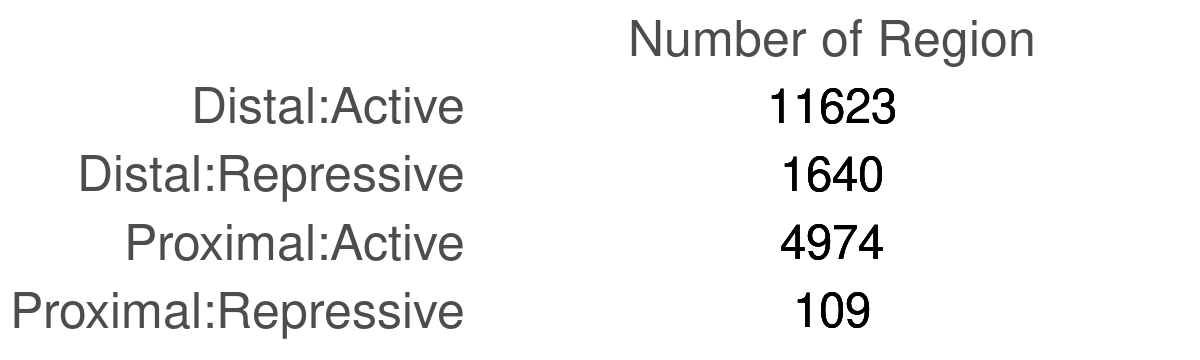

In [122]:
ggplot(tmp, aes(Variable, Label, label = Value)) + 
    geom_text(size = 10) +
    scale_x_discrete(position = "top", labels = c("Number of Region")) +
    labs(y = NULL, x = NULL) +
    theme_classic() +
    theme(
        strip.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        axis.line = element_blank(),
        axis.text.y = element_text(size = 30),
        axis.text.x = element_text(size = 30),
        axis.ticks = element_blank(),
    )

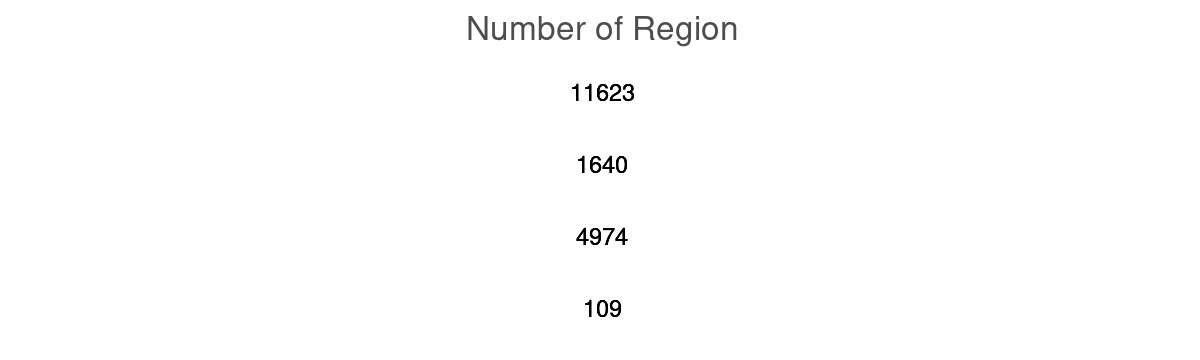

In [123]:
ggplot(tmp, aes(Variable, Label, label = Value)) + 
    geom_text(size = 5) +
    scale_x_discrete(position = "top", labels = c("Number of Region")) +
    labs(y = NULL, x = NULL) +
    theme_classic() +
    theme(
        strip.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        axis.line = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.ticks = element_blank(),
    )

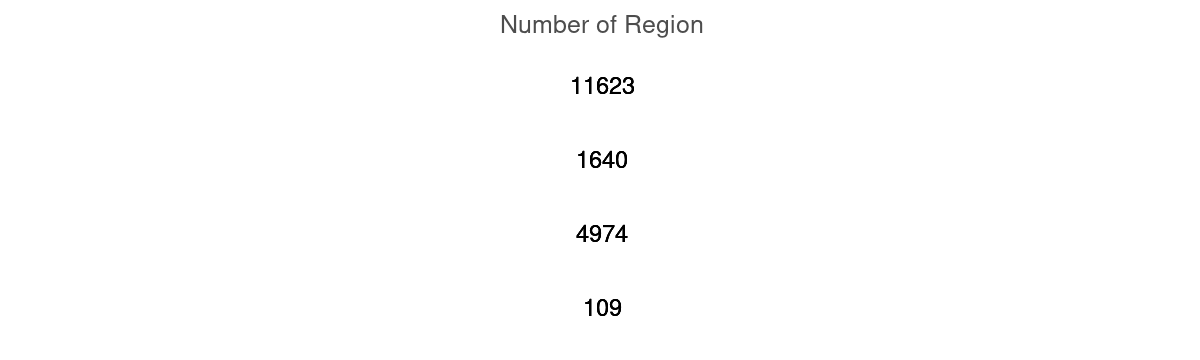

In [126]:
gpt_text_count = ggplot(tmp, aes(Variable, Label, label = Value)) + 
    geom_text(size = 5) +
    scale_x_discrete(position = "top", labels = c("Number of Region")) +
    labs(y = NULL, x = NULL) +
    theme_classic() +
    theme(
        strip.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        axis.line = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(size = 15),
        axis.ticks = element_blank(),
    )

gpt_text_count

In [52]:
### Init label
dat = dat_region_screen_crispr

### Summarize by counting each label
dat = dat %>%
    dplyr::group_by(Label, Screen) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

### Calculate the proportion
dat = dat %>%
    dplyr::group_by(Label) %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

### show
fun_display_table(dat)

Label,Screen,Count,Total,Freq
Distal:Active,0,2350,11623,0.2021853
Distal:Active,1,9273,11623,0.7978147
Distal:Repressive,0,682,1640,0.4158537
Distal:Repressive,1,958,1640,0.5841463
Proximal:Active,0,24,4974,0.0048251
Proximal:Active,1,4950,4974,0.9951749
Proximal:Repressive,0,2,109,0.0183486
Proximal:Repressive,1,107,109,0.9816514


In [53]:
dat = dat %>%
    dplyr::mutate(Freq_Text = paste0(round(Freq * 100, 1), "%")) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Freq_Text, ")")) %>%
    dplyr::mutate(Count_Text = paste0(Count, " ", "(", Freq_Text, ")"))

dat = dat %>% dplyr::filter(Screen == 1)

### show
fun_display_table(dat)

Label,Screen,Count,Total,Freq,Freq_Text,Label_Text,Count_Text
Distal:Active,1,9273,11623,0.7978147,79.8%,Distal:Active (79.8%),9273 (79.8%)
Distal:Repressive,1,958,1640,0.5841463,58.4%,Distal:Repressive (58.4%),958 (58.4%)
Proximal:Active,1,4950,4974,0.9951749,99.5%,Proximal:Active (99.5%),4950 (99.5%)
Proximal:Repressive,1,107,109,0.9816514,98.2%,Proximal:Repressive (98.2%),107 (98.2%)


In [54]:
### Init label
dat = dat_region_screen_crispr
    
### Summarize by counting each label
dat = dat %>%
    dplyr::group_by(Label, Screen, Signif) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

### Calculate the proportion
dat = dat %>%
    dplyr::group_by(Label) %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

### assign and show
dat_region_screen_summary = dat
fun_display_table(dat)

Label,Screen,Signif,Count,Total,Freq
Distal:Active,0,0,2350,11623,0.2021853
Distal:Active,1,0,8688,11623,0.7474834
Distal:Active,1,1,585,11623,0.0503312
Distal:Repressive,0,0,682,1640,0.4158537
Distal:Repressive,1,0,913,1640,0.5567073
Distal:Repressive,1,1,45,1640,0.0274390
Proximal:Active,0,0,24,4974,0.0048251
Proximal:Active,1,0,3933,4974,0.7907117
Proximal:Active,1,1,1017,4974,0.2044632
Proximal:Repressive,0,0,2,109,0.0183486


In [56]:
dat = dat_region_screen_summary

dat = dat %>%
    dplyr::mutate(Freq_Text = paste0(round(Freq * 100, 1), "%")) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Freq_Text, ")")) %>%
    dplyr::mutate(Count_Text = paste0(Count, " ", "(", Freq_Text, ")"))

dat = dat %>% dplyr::filter(Signif == 1)

### show
fun_display_table(dat)

Label,Screen,Signif,Count,Total,Freq,Freq_Text,Label_Text,Count_Text
Distal:Active,1,1,585,11623,0.0503312,5%,Distal:Active (5%),585 (5%)
Distal:Repressive,1,1,45,1640,0.0274390,2.7%,Distal:Repressive (2.7%),45 (2.7%)
Proximal:Active,1,1,1017,4974,0.2044632,20.4%,Proximal:Active (20.4%),1017 (20.4%)
Proximal:Repressive,1,1,6,109,0.0550459,5.5%,Proximal:Repressive (5.5%),6 (5.5%)


In [57]:
### init
dat = dat_region_screen_summary

### Label the combination
fun = function(vec){
    res = fun_str_map_match(
        vec, 
        c("00", "10", "11"),
        c("Not Screened", "Not Significant", "Significant")
    )
    return(res)
}
dat = dat %>% 
    dplyr::mutate(Note = paste0(Screen, Signif)) %>%
    dplyr::mutate(Note = fun(Note))

###
dat = dat %>%
    dplyr::mutate(
        Total_Text = ifelse(
            Total > 1000, 
            paste0(round(Total / 1000, 1), "K"),
            Total
        )
    ) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Total_Text, ")"))

### assign and show
dat_region_screen_plot = dat
fun_display_table(dat)

Label,Screen,Signif,Count,Total,Freq,Note,Total_Text,Label_Text
Distal:Active,0,0,2350,11623,0.2021853,Not Screened,11.6K,Distal:Active (11.6K)
Distal:Active,1,0,8688,11623,0.7474834,Not Significant,11.6K,Distal:Active (11.6K)
Distal:Active,1,1,585,11623,0.0503312,Significant,11.6K,Distal:Active (11.6K)
Distal:Repressive,0,0,682,1640,0.4158537,Not Screened,1.6K,Distal:Repressive (1.6K)
Distal:Repressive,1,0,913,1640,0.5567073,Not Significant,1.6K,Distal:Repressive (1.6K)
Distal:Repressive,1,1,45,1640,0.0274390,Significant,1.6K,Distal:Repressive (1.6K)
Proximal:Active,0,0,24,4974,0.0048251,Not Screened,5K,Proximal:Active (5K)
Proximal:Active,1,0,3933,4974,0.7907117,Not Significant,5K,Proximal:Active (5K)
Proximal:Active,1,1,1017,4974,0.2044632,Significant,5K,Proximal:Active (5K)
Proximal:Repressive,0,0,2,109,0.0183486,Not Screened,109,Proximal:Repressive (109)


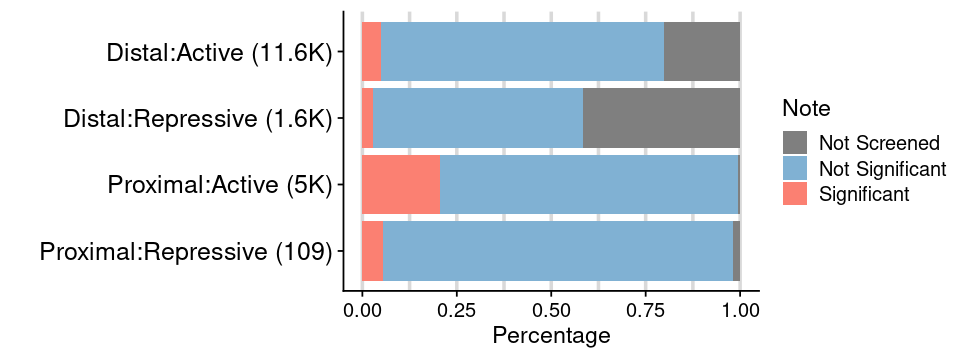

In [119]:
dat = dat_region_screen_plot

vec_txt_label = c("Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive")
dat = dat %>% 
    dplyr::mutate(Label = factor(Label, levels=rev(vec_txt_label))) %>% 
    dplyr::arrange(Label) %>%
    dplyr::mutate(Label_Text = factor(Label_Text, levels=unique(Label_Text)))

vec_txt_color = c("grey50", "#80b1d3", "#fb8072")
names(vec_txt_color) = c("Not Screened", "Not Significant", "Significant")


gpt = ggplot(dat, aes(y = Label_Text, x = Freq, fill = Note)) + 
    geom_bar(stat = "identity") +
    scale_fill_manual(values = vec_txt_color) +
    labs(x="Percentage", y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

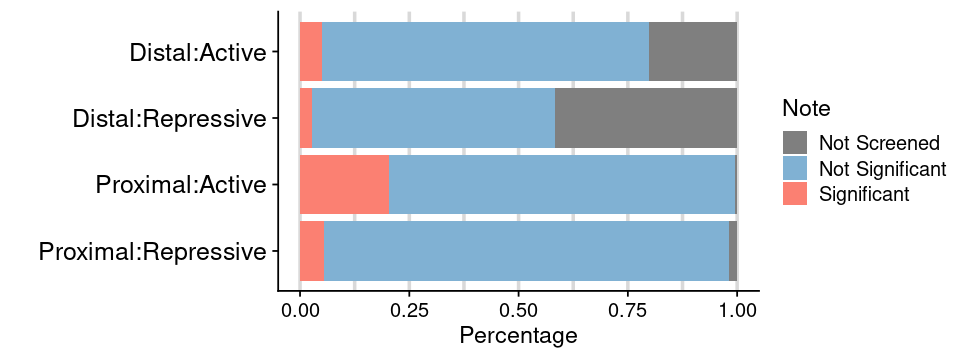

In [129]:
dat = dat_region_screen_plot

vec_txt_label = c("Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive")
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=rev(vec_txt_label)))

vec_txt_color = c("grey50", "#80b1d3", "#fb8072")
names(vec_txt_color) = c("Not Screened", "Not Significant", "Significant")


gpt = ggplot(dat, aes(y = Label, x = Freq, fill = Note)) + 
    geom_bar(stat = "identity") +
    scale_fill_manual(values = vec_txt_color) +
    labs(x="Percentage", y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

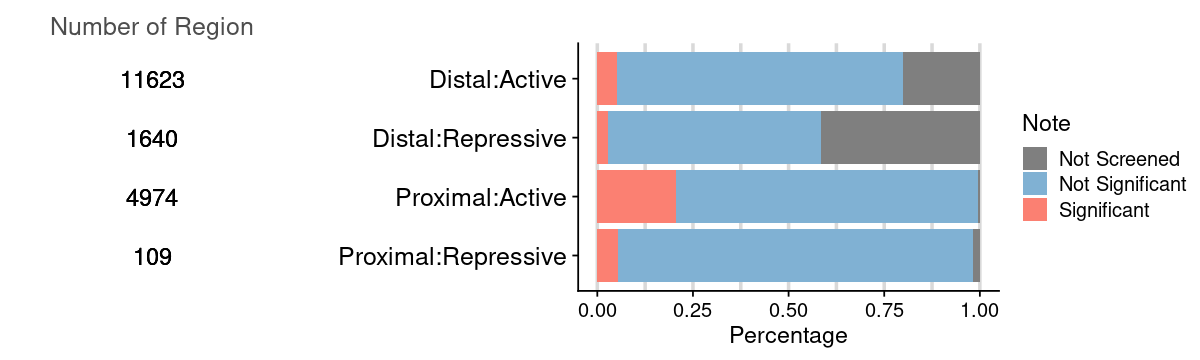

In [130]:
options(repr.plot.height=3, repr.plot.width=10)
plot_grid(gpt_text_count, gpt, nrow=1, rel_widths = c(1,3), align = "h")

In [65]:
lst = lst_region_annot

### testing
dat = lst[[1]]
dat = dat %>% dplyr::filter(Signif == 1)

### Summarize by counting each label
dat = dat %>%
    dplyr::group_by(Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

### Calculate the proportion
dat = dat %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

dat$Assay = "CRISPR-Total"

fun_display_table(dat)

Label,Count,Total,Freq,Assay
Distal:Active,585,1653,0.3539020,CRISPR-Total
Distal:Repressive,45,1653,0.0272232,CRISPR-Total
Proximal:Active,1017,1653,0.6152450,CRISPR-Total
Proximal:Repressive,6,1653,0.0036298,CRISPR-Total


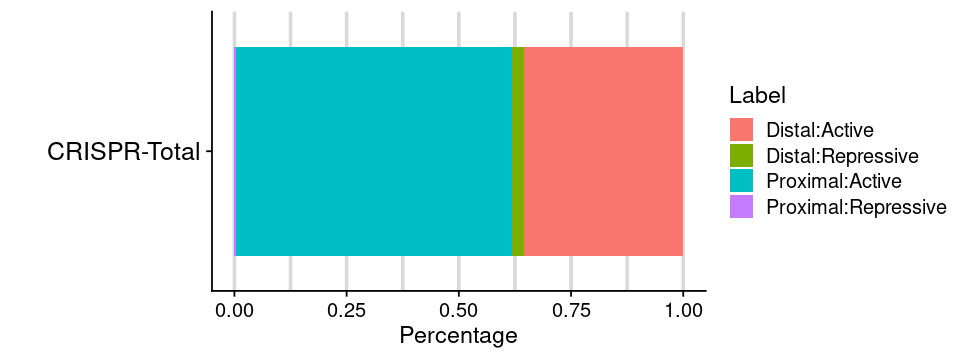

In [69]:
vec_txt_label = c("Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive")
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=vec_txt_label))

gpt = ggplot(dat, aes(y = Assay, x = Freq, fill = Label)) + 
    geom_bar(stat = "identity") +
    labs(x="Percentage", y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

print(gpt)

In [76]:
lst = lst_region_annot
lst = lapply(lst, function(dat){
    ### Only looping at the significant regions
    dat = dat %>% dplyr::filter(Signif == 1)

    ### Summarize by counting each label
    dat = dat %>%
        dplyr::group_by(Label) %>%
        dplyr::summarise(Count = n(), .groups = "drop")
    
    ### Calculate the proportion
    dat = dat %>%
        dplyr::mutate(Total = sum(Count)) %>%
        dplyr::ungroup() %>%
        dplyr::mutate(Freq = Count / Total)

    return(dat)
})

dat = bind_rows(lst, .id = "Assay")

dat_region_signif_summary = dat
fun_display_table(dat)

Assay,Label,Count,Total,Freq
CRISPR-Total,Distal:Active,585,1653,0.3539020
CRISPR-Total,Distal:Repressive,45,1653,0.0272232
CRISPR-Total,Proximal:Active,1017,1653,0.6152450
CRISPR-Total,Proximal:Repressive,6,1653,0.0036298
CRISPRi-Growth,Distal:Active,420,1479,0.2839757
CRISPRi-Growth,Distal:Repressive,45,1479,0.0304260
CRISPRi-Growth,Proximal:Active,1008,1479,0.6815416
CRISPRi-Growth,Proximal:Repressive,6,1479,0.0040568
CRISPRi-HCRFF,Distal:Active,18,30,0.6000000
CRISPRi-HCRFF,Distal:Repressive,1,30,0.0333333


In [77]:
dat = dat_region_signif_summary
dat = dat %>%
    dplyr::mutate(Freq_Text = paste0(round(Freq * 100, 1), "%")) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Freq_Text, ")")) %>%
    dplyr::mutate(Count_Text = paste0(Count, " ", "(", Freq_Text, ")"))
dat

Assay,Label,Count,Total,Freq,Freq_Text,Label_Text,Count_Text
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
CRISPR-Total,Distal:Active,585,1653,0.353901996,35.4%,Distal:Active (35.4%),585 (35.4%)
CRISPR-Total,Distal:Repressive,45,1653,0.027223230,2.7%,Distal:Repressive (2.7%),45 (2.7%)
CRISPR-Total,Proximal:Active,1017,1653,0.615245009,61.5%,Proximal:Active (61.5%),1017 (61.5%)
CRISPR-Total,Proximal:Repressive,6,1653,0.003629764,0.4%,Proximal:Repressive (0.4%),6 (0.4%)
CRISPRi-Growth,Distal:Active,420,1479,0.283975659,28.4%,Distal:Active (28.4%),420 (28.4%)
CRISPRi-Growth,Distal:Repressive,45,1479,0.030425963,3%,Distal:Repressive (3%),45 (3%)
CRISPRi-Growth,Proximal:Active,1008,1479,0.681541582,68.2%,Proximal:Active (68.2%),1008 (68.2%)
CRISPRi-Growth,Proximal:Repressive,6,1479,0.004056795,0.4%,Proximal:Repressive (0.4%),6 (0.4%)
CRISPRi-HCRFF,Distal:Active,18,30,0.600000000,60%,Distal:Active (60%),18 (60%)


In [84]:
dat = dat_region_signif_summary

dat = dat %>%
    dplyr::mutate(
        Total_Text = ifelse(
            Total > 1000, 
            paste0(round(Total / 1000, 1), "K"),
            Total
        )
    ) %>%
    dplyr::mutate(Assay_Text = paste0(Assay, " ", "(", Total_Text, ")"))
dat

Assay,Label,Count,Total,Freq,Total_Text,Assay_Text
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
CRISPR-Total,Distal:Active,585,1653,0.353901996,1.7K,CRISPR-Total (1.7K)
CRISPR-Total,Distal:Repressive,45,1653,0.027223230,1.7K,CRISPR-Total (1.7K)
CRISPR-Total,Proximal:Active,1017,1653,0.615245009,1.7K,CRISPR-Total (1.7K)
CRISPR-Total,Proximal:Repressive,6,1653,0.003629764,1.7K,CRISPR-Total (1.7K)
CRISPRi-Growth,Distal:Active,420,1479,0.283975659,1.5K,CRISPRi-Growth (1.5K)
CRISPRi-Growth,Distal:Repressive,45,1479,0.030425963,1.5K,CRISPRi-Growth (1.5K)
CRISPRi-Growth,Proximal:Active,1008,1479,0.681541582,1.5K,CRISPRi-Growth (1.5K)
CRISPRi-Growth,Proximal:Repressive,6,1479,0.004056795,1.5K,CRISPRi-Growth (1.5K)
CRISPRi-HCRFF,Distal:Active,18,30,0.600000000,30,CRISPRi-HCRFF (30)


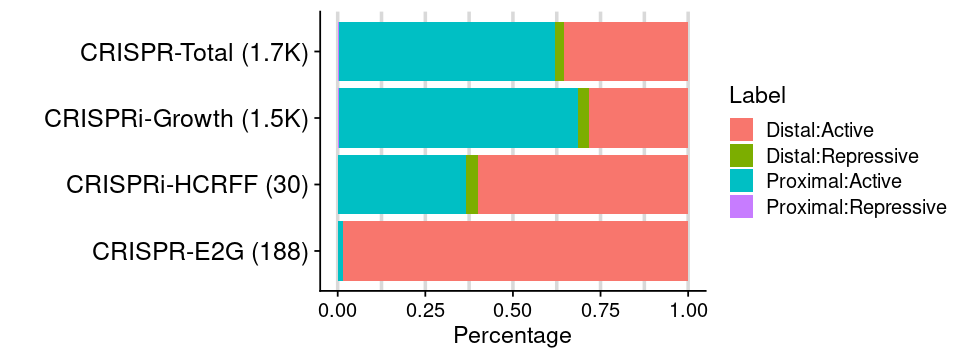

In [86]:
dat = dat_region_signif_summary
dat = dat %>%
    dplyr::mutate(
        Total_Text = ifelse(
            Total > 1000, 
            paste0(round(Total / 1000, 1), "K"),
            Total
        )
    ) %>%
    dplyr::mutate(Assay_Text = paste0(Assay, " ", "(", Total_Text, ")"))

vec_txt_assay = c("CRISPR-Total", "CRISPRi-Growth", "CRISPRi-HCRFF", "CRISPR-E2G")
dat = dat %>% dplyr::mutate(Assay = factor(Assay, levels=rev(vec_txt_assay))) %>%
    dplyr::arrange(Assay) %>%
    dplyr::mutate(Assay_Text = factor(Assay_Text, levels=unique(Assay_Text)))

vec_txt_label = c("Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive")
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=vec_txt_label))

gpt = ggplot(dat, aes(y = Assay_Text, x = Freq, fill = Label)) + 
    geom_bar(stat = "identity") +
    labs(x="Percentage", y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

print(gpt)

In [ ]:
dat_region_screen_summary

### Generate label for plotting
tmp = dat %>%
    dplyr::filter(Screen == "Screened") %>%
    dplyr::mutate(Freq_Label = paste0(round(Freq * 100, 1), "%")) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Freq_Label, ")") )%>%
    dplyr::select(Label, Label_Text)

### Merge the label back to the table
dat = dplyr::left_join(dat, tmp, by = "Label")

In [23]:
### Init label
dat = dat_region_screen_crispr

### Summarize by counting each label
dat = dat %>%
    dplyr::group_by(Label, Screen) %>%
    dplyr::summarise(Count = n(), .groups = "drop") 

### Calculate the proportion
dat = dat %>%
    dplyr::group_by(Label) %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

dat

Label,Screen,Count,Total,Freq
<chr>,<dbl>,<int>,<int>,<dbl>
Distal:Active,0,2350,11623,0.20218532
Distal:Active,1,9273,11623,0.79781468
Distal:Repressive,0,682,1640,0.41585366
Distal:Repressive,1,958,1640,0.58414634
Proximal:Active,0,24,4974,0.00482509
Proximal:Active,1,4950,4974,0.99517491
Proximal:Repressive,0,2,109,0.01834862
Proximal:Repressive,1,107,109,0.98165138


In [ ]:
dat = dat %>% 
    dplyr::mutate(Screen = ifelse(Screen == 1, "Screened", "Not Screened")) %>%
    dplyr::distinct()